### Ultimate 25k+ Matches Football Database 2023-07-14

Data was taken from Kaggle:

https://www.kaggle.com/datasets/prajitdatta/ultimate-25k-matches-football-database-european

#### Main goal:
Predict the football match outcome<br>
Predict 2015/2016 season matches outcome based only on previous season data.

#### EDA questions to answer:
Which leagues are in which countries?<br>
How many teams each league have? <br>
What is the gaol difference between Home and Away teams on average? <br>
Which leagues score the most goals? <br>
Which leagues are the best according to Buildup, Chance Creation and defence statistics?<br>
How player's height affects its potential and overall rating? <br>
What is the distribution of players according to their preffered foot? How it affects their pottential and overall rating? <br>
What are the best players in various categories?<br>
Who are the best scorers?<br>
How match outcomes are distributed?<br>

### Required modules

In [78]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import scipy.stats as stats
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from IPython.display import Image, display
from plotly.io import to_image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    ConfusionMatrixDisplay,
    classification_report,
)

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Creating SQL Connection and loading data

In [2]:
con = sqlite3.connect("database.sqlite")
cur = con.cursor()

<IPython.core.display.Javascript object>

In [3]:
# Loading data
df_country = pd.read_sql("SELECT * FROM Country", con)
df_league = pd.read_sql("SELECT * FROM League", con)
df_match = pd.read_sql("SELECT * FROM Match", con)
df_player = pd.read_sql("SELECT * FROM Player", con)
df_player_att = pd.read_sql("SELECT * FROM Player_Attributes", con)
df_team = pd.read_sql("SELECT * FROM Team", con)
df_team_att = pd.read_sql("SELECT * FROM Team_Attributes", con)

<IPython.core.display.Javascript object>

### Checking and Cleaning Data

In [4]:
def nan_and_duplicates(df):
    return print(
        f"There are {df.duplicated().sum()} duplicates.\nNull values: {df.isna().sum().sum()}"
    )

<IPython.core.display.Javascript object>

##### Country table

In [5]:
nan_and_duplicates(df_country)

There are 0 duplicates.
Null values: 0


<IPython.core.display.Javascript object>

##### League table

In [6]:
nan_and_duplicates(df_league)

There are 0 duplicates.
Null values: 0


<IPython.core.display.Javascript object>

##### Match table

In [7]:
nan_and_duplicates(df_match)

There are 0 duplicates.
Null values: 407395


<IPython.core.display.Javascript object>

In [8]:
print(df_match.isna().sum())

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64


<IPython.core.display.Javascript object>

Most of the missing values are in the attributes that I won't use. Therefore I am not going to do any with this table.

##### Player table

In [9]:
nan_and_duplicates(df_player)

There are 0 duplicates.
Null values: 0


<IPython.core.display.Javascript object>

In [65]:
df_player.head(5)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


<IPython.core.display.Javascript object>

##### Player attributes table

In [10]:
nan_and_duplicates(df_player_att)

There are 0 duplicates.
Null values: 47301


<IPython.core.display.Javascript object>

In [11]:
print(df_player_att.isna().sum())

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

<IPython.core.display.Javascript object>

I am not going going to use attacking and defensive work rate columns, therefore I will drop them. Also I will drop the missing values

In [12]:
df_player_att.drop(["attacking_work_rate", "defensive_work_rate"], axis=1, inplace=True)
df_player_att.dropna(inplace=True)
nan_and_duplicates(df_player_att)

There are 0 duplicates.
Null values: 0


<IPython.core.display.Javascript object>

##### Team table

In [13]:
nan_and_duplicates(df_team)

There are 0 duplicates.
Null values: 11


<IPython.core.display.Javascript object>

In [14]:
print(df_team.isna().sum())

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64


<IPython.core.display.Javascript object>

Only column "team_api_id" will be used, "team_fifa_api_id" is not needed.

In [15]:
df_team.drop(["team_fifa_api_id"], axis=1, inplace=True)
nan_and_duplicates(df_team)

There are 0 duplicates.
Null values: 0


<IPython.core.display.Javascript object>

##### Team attributes table

In [16]:
nan_and_duplicates(df_team_att)

There are 0 duplicates.
Null values: 969


<IPython.core.display.Javascript object>

In [17]:
print(df_team_att.isna().sum())

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64


<IPython.core.display.Javascript object>

After manually checking I found out that "buildUpPlayDribbling" was recorded only from 2014. In most recent years, all teams have this attribute values.

In [18]:
df_team_att.dropna(inplace=True)
nan_and_duplicates(df_team_att)

There are 0 duplicates.
Null values: 0


<IPython.core.display.Javascript object>

### EDA

In [79]:
def show_fig(fig, render="interactive"):
    """
      Display a Plotly figure as a static image or as an interactive figure within a Jupyter Notebook.

      Parameters:
      - fig (go.Figure): The Plotly figure to display.
      - render (str, optional): The rendering type. Use 'image' for a static image or 'interactive' for an interactive figure. Defaults to 'image'.

      Returns:
      - None
      """
    if render == "image":
        image_bytes = to_image(fig, format="png")
        display(Image(image_bytes))
    elif render == "interactive":
        display(fig)

<IPython.core.display.Javascript object>

### Analyzing leagues

#### Which leagues are in which countries?

In [19]:
leagues_countries_q = """
SELECT c.name as Country, l.name as League
FROM country c
LEFT JOIN league l ON c.id = l.country_id
"""

pd.read_sql(leagues_countries_q, con)

,Country,League
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


<IPython.core.display.Javascript object>

#### Collecting data in more covenient way to analyze match data

In [20]:
leagues_by_season_q = """
SELECT Country.name AS country_name, 
                                    League.name AS league_name, 
                                    season,
                                    count(distinct stage) AS number_of_stages,
                                    count(distinct HT.team_long_name) AS number_of_teams,
                                    avg(home_team_goal) AS avg_home_team_scors, 
                                    avg(away_team_goal) AS avg_away_team_goals, 
                                    avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                    avg(home_team_goal+away_team_goal) AS avg_goals, 
                                    sum(home_team_goal+away_team_goal) AS total_goals                                       
                            FROM Match
                            JOIN Country on Country.id = Match.country_id
                            JOIN League on League.id = Match.league_id
                            LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                            LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                            
                            GROUP BY Country.name, League.name, season
                            HAVING count(distinct stage) > 10
                            ORDER BY Country.name, League.name, season DESC
"""
leagues_by_season = pd.read_sql(leagues_by_season_q, con)
leagues_by_season.head(3)

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,Belgium,Belgium Jupiler League,2015/2016,30,16,1.675000,1.216667,0.458333,2.891667,694
1,Belgium,Belgium Jupiler League,2014/2015,30,16,1.566667,1.216667,0.350000,2.783333,668
2,Belgium,Belgium Jupiler League,2012/2013,30,16,1.562500,1.366667,0.195833,2.929167,703


<IPython.core.display.Javascript object>

#### Number of teams distribution among the leagues

In [21]:
# Creating a pivot table of Number of teams per league by season
pivot_n_teams = leagues_by_season.pivot(
    index="league_name", columns="season", values="number_of_teams"
)
# Ordering descending
pivot_n_teams = pivot_n_teams.sort_values(by=pivot_n_teams.columns[-1], ascending=False)

<IPython.core.display.Javascript object>

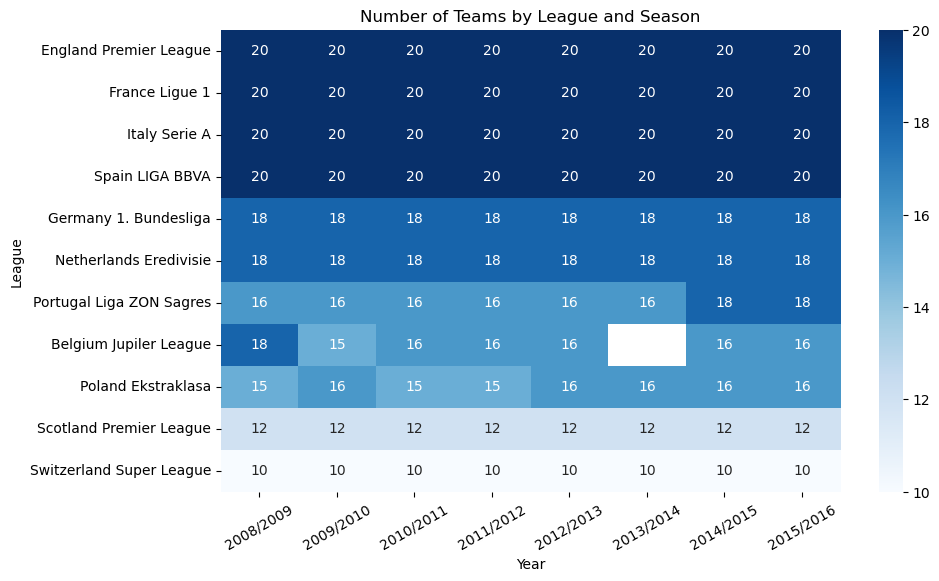

<IPython.core.display.Javascript object>

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_n_teams, cmap="Blues", annot=True)
plt.xticks(rotation=30)
plt.xlabel("Year")
plt.ylabel("League")
plt.title("Number of Teams by League and Season")
plt.show()

Most of the leagues have 16-20 teams. However, Scotland and Switzerland football leagues only have 10-12 teams included.

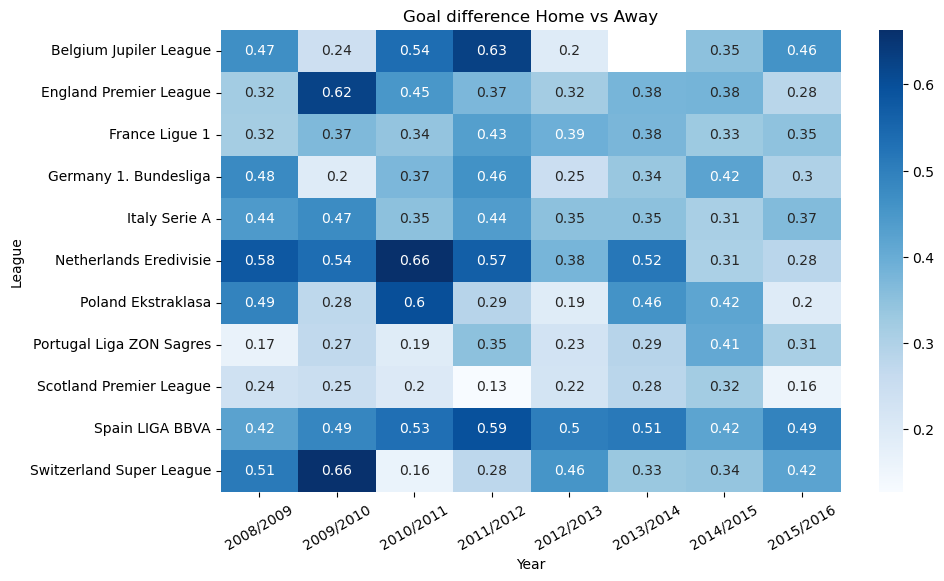

<IPython.core.display.Javascript object>

In [23]:
pivot_goal_diff = leagues_by_season.pivot(
    index="league_name", columns="season", values="avg_goal_dif"
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_goal_diff, cmap="Blues", annot=True)
plt.xticks(rotation=30)
plt.xlabel("Year")
plt.ylabel("League")
plt.title("Goal difference Home vs Away")
plt.show()

In most of the seasons and leagues, the home team has a positive goal difference, indicating a home advantage. We can see  consistency in some leagues, for example Spain LIGA BBVA tends to have big difference, which indicates stronger home arena influence.

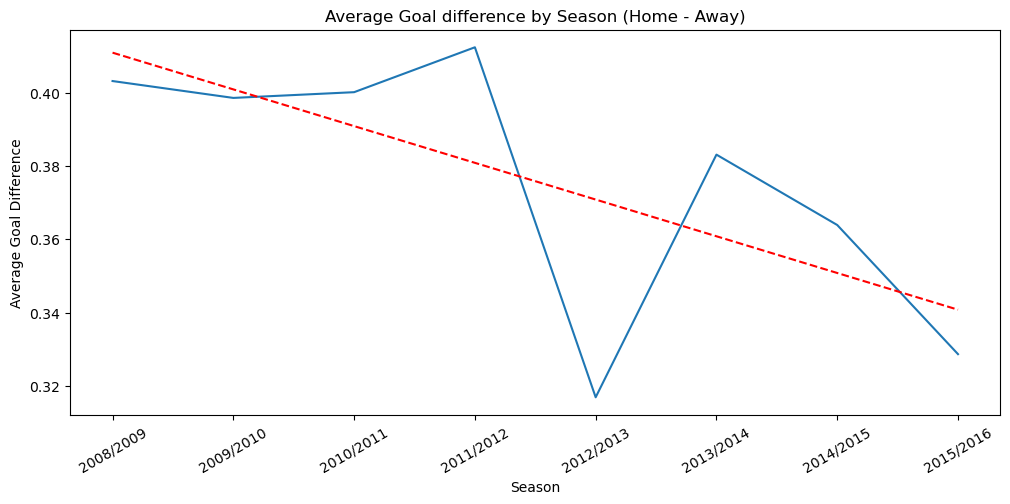

<IPython.core.display.Javascript object>

In [24]:
avg_goal_dif_by_season = leagues_by_season.groupby(["season"])["avg_goal_dif"].mean()

# Generating trend line
x = np.arange(len(avg_goal_dif_by_season))
coefficients = np.polyfit(x, avg_goal_dif_by_season.values, 1)
trend_line = np.poly1d(coefficients)(x)

plt.figure(figsize=(12, 5))
plt.plot(avg_goal_dif_by_season.index, avg_goal_dif_by_season.values)
plt.plot(avg_goal_dif_by_season.index, trend_line, linestyle="--", color="r")
plt.xlabel("Season")
plt.ylabel("Average Goal Difference")
plt.title("Average Goal difference by Season (Home - Away)")
plt.xticks(rotation=30)
plt.show()

On average, home teams tend to outscore their away opponents, suggesting a general home field advantage in football. Decreasing goal difference trend indicate a potential shift in the dynamics of football matches, with away teams becoming more competitive.

#### Which leagues score the most/fewest goals?

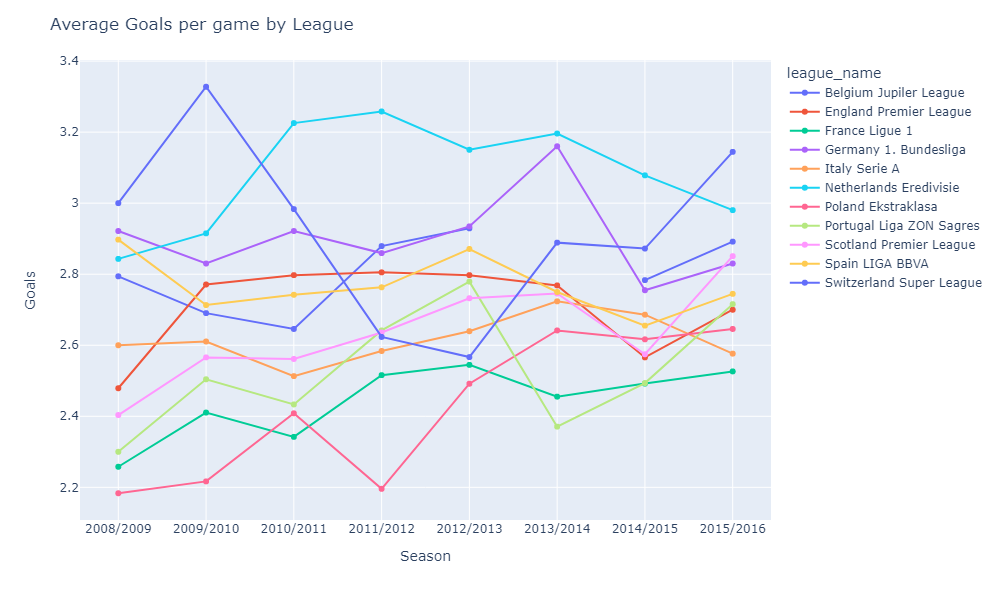

<IPython.core.display.Javascript object>

In [80]:
pivot_avg_goals = leagues_by_season.pivot(
    index="league_name", columns="season", values="avg_goals"
)

fig = px.line(pivot_avg_goals.T, markers=True)
fig.update_layout(
    title="Average Goals per game by League",
    xaxis_title="Season",
    yaxis_title="Goals",
    width=1000,
    height=600,
)
show_fig(fig, render="image")

France, Italy and Poland football leagues matches have the least goals on average. While Swtizerland, Netherlands and Belgium have the most goals per match on average. It could suggest, that the leagues, who have lower quality of football / clubs, tends to score more and defence is not that strong.

Across multiple leagues, there is a certain level of stability in average goals per game from season to season, indicating that goal-scoring tendencies in football can remain relatively consistent over time.

By looking at Netherlands and Switzerland average goals per league and home advantage data, I noticed a possible correlation, as during the years, when these countries had the biggest home advantage in Europe, they also tend to score more on average per match.

##### Correlation between home advantage and average goals per game

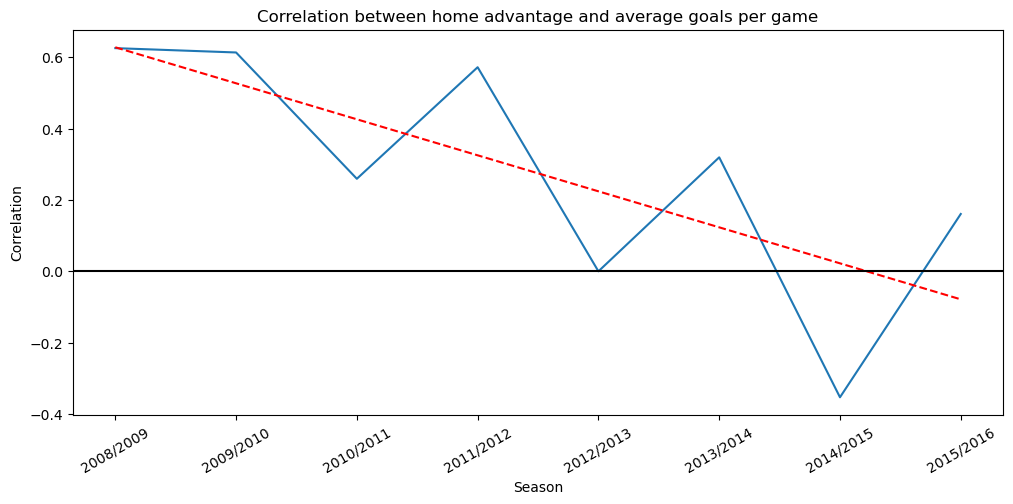

<IPython.core.display.Javascript object>

In [26]:
correlation = pivot_avg_goals.corrwith(pivot_goal_diff)

x = np.arange(len(correlation))
coefficients = np.polyfit(x, correlation.values, 1)
trend_line = np.poly1d(coefficients)(x)

plt.figure(figsize=(12, 5))
plt.plot(correlation.index, correlation.values)
plt.plot(correlation.index, trend_line, linestyle="--", color="r")
plt.axhline(0, color="k", linestyle="-")
plt.xlabel("Season")
plt.ylabel("Correlation")
plt.title("Correlation between home advantage and average goals per game")
plt.xticks(rotation=30)
plt.show()

During the early years 2008-2012, we can see that there was quite high correlation between home advantage and number of goals scored per game. However, this correlation decreases together with decreasing home advantage over the years.

Negative correlation on 2014/2015 season could be explained by decreased number of goals in all leagues this season.

### Teams analysis

In [27]:
print(
    f"There are {len(df_team['team_api_id'].unique())} unique teams in the whole dataset."
)

There are 299 unique teams in the whole dataset.


<IPython.core.display.Javascript object>

##### Craeting a dataframe with simplified team stats

In [28]:
team_stats_q = """
WITH team_stats AS (
SELECT team_api_id, 
STRFTIME('%Y', date) as year, 
(buildUpPlaySpeed + buildUpPlayPassing) / 2 as BuildUp, 
(chanceCreationPassing + chanceCreationCrossing + chanceCreationShooting) / 3 as ChanceCreation, 
(defencePressure + defenceAggression) / 2 AS defence
FROM Team_Attributes
),
team_leagues AS (
SELECT DISTINCT m.home_team_api_id, l.name
FROM Match m
LEFT JOIN league l ON l.id = m.league_id
)

SELECT tl.name as League, ts.team_api_id, ts.year, ts.BuildUp, ts.ChanceCreation, ts.defence
FROM team_stats ts
LEFT JOIN team_leagues tl ON ts.team_api_id = tl.home_team_api_id
ORDER BY League, year
"""
# Buildup considers Build up play speed and passing.
# ChanceCreation considers ChanceCreation Passing, Crossing and Shooting.
# Defence considers Defence Pressure and Aggression
team_stats = pd.read_sql(team_stats_q, con)
team_stats.head(3)

,League,team_api_id,year,BuildUp,ChanceCreation,defence
0,Belgium Jupiler League,8635,2010,42,60,60
1,Belgium Jupiler League,9993,2010,35,45,70
2,Belgium Jupiler League,9984,2010,40,56,62


<IPython.core.display.Javascript object>

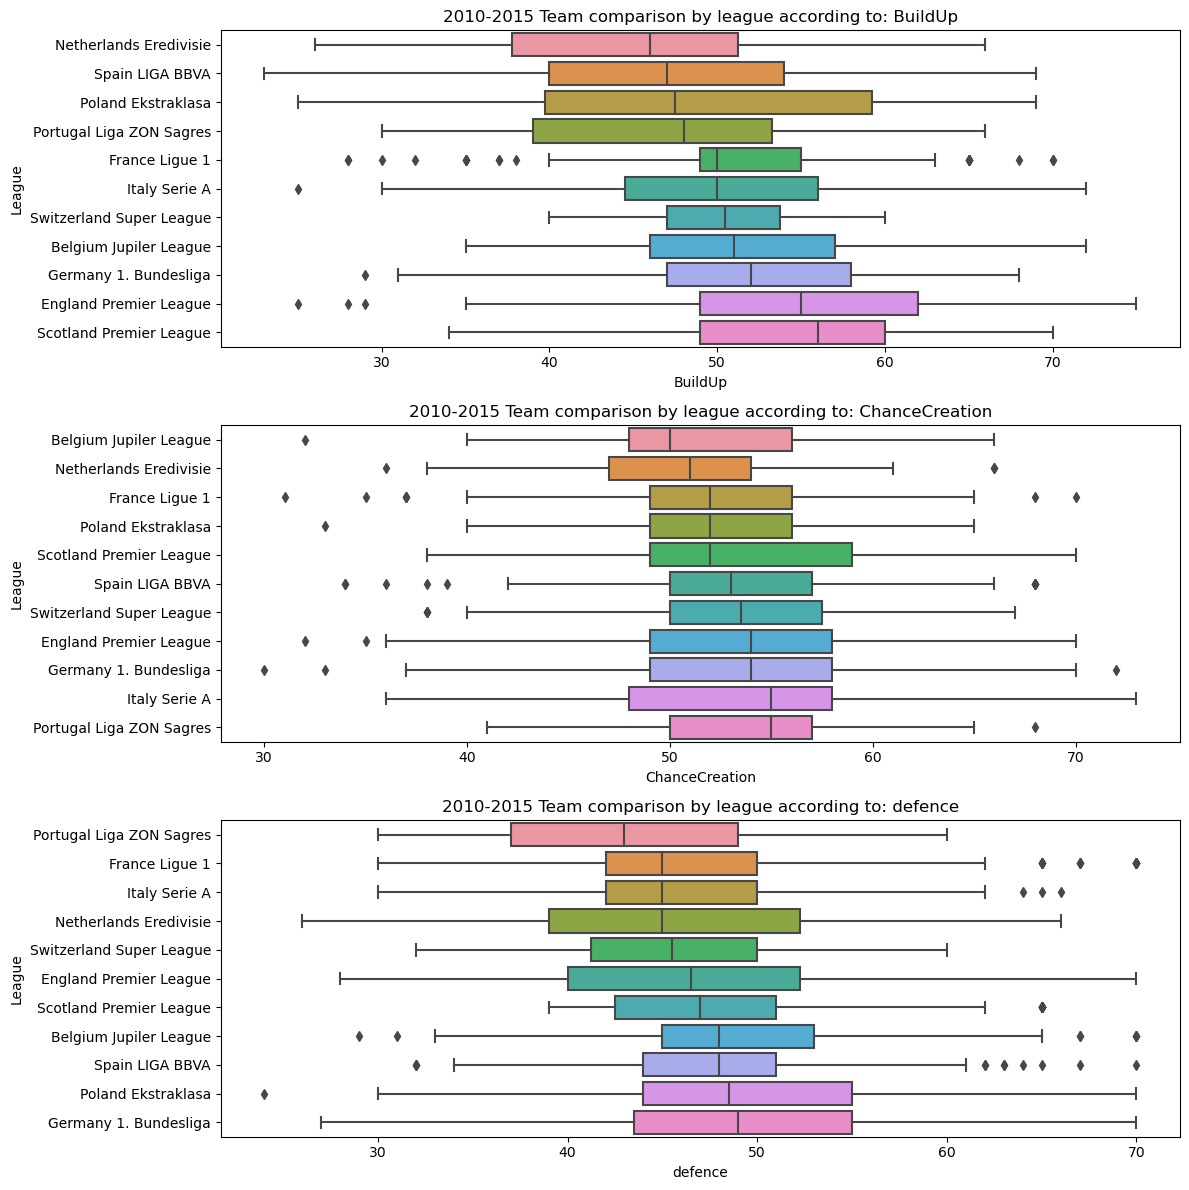

<IPython.core.display.Javascript object>

In [29]:
attributes = ["BuildUp", "ChanceCreation", "defence"]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

for i, attribute in enumerate(attributes):
    median_values_sorted = team_stats.groupby("League").median().sort_values(attribute)
    sns.boxplot(
        data=team_stats,
        x=attribute,
        y="League",
        order=median_values_sorted.index,
        ax=axes[i],
    )
    axes[i].set_title(f"2010-2015 Team comparison by league according to: {attribute}")
    axes[i].set_xlabel(attribute)
plt.tight_layout()
plt.show()

##### Buildup 

Buildup considers Build up play speed and passing. <br> 
The highest number of buildup statistics can be seen in England and Scotland countries football leagues, which could indicate that football matches can be more entertaining to watch if you like fast, with many passes football. While the lowest score is in Belgium and Netherlands football leagues.

##### Chance creation

ChanceCreation considers ChanceCreation Passing, Crossing and Shooting. <br>
Germany Poland and Spain football leagues have the highest Chance creation statistic. These football leagues tends to have a higher quality of created chances. While Belgium's has the lowest score.

##### Defence

Defence considers Defence Pressure and Aggression. <br>
Germany and Poland football leagues teams tends to have the best defence. Portugal football league - the worse.

### Players analysis

In [30]:
print(
    f"There are {df_player_att['player_fifa_api_id'].nunique()} players in  this dataset."
)
print(
    f"In total, there are {df_player_att.shape[0]} records and {df_player_att.shape[1]} attributes."
)

There are 10582 players in  this dataset.
In total, there are 181265 records and 40 attributes.


<IPython.core.display.Javascript object>

##### Analysing players height and weight

In [31]:
players_height = pd.read_sql(
    """SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""",
    con,
)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


<IPython.core.display.Javascript object>

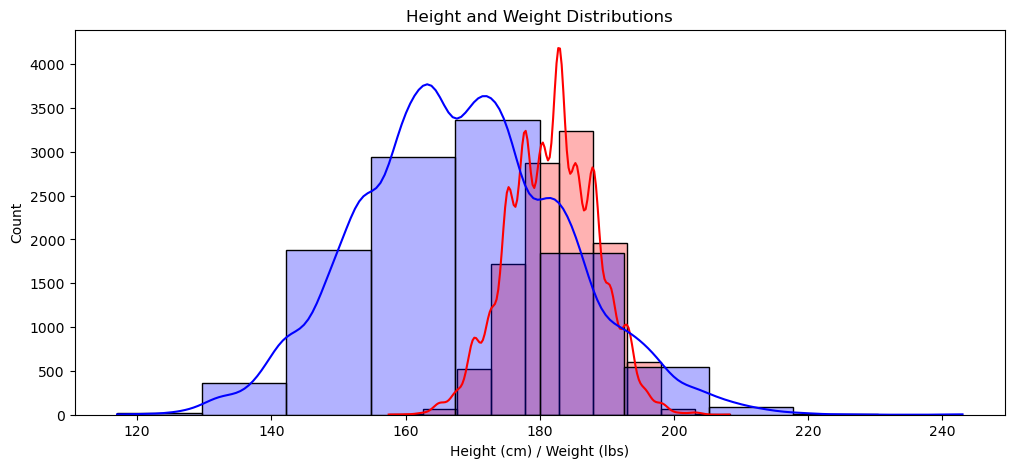

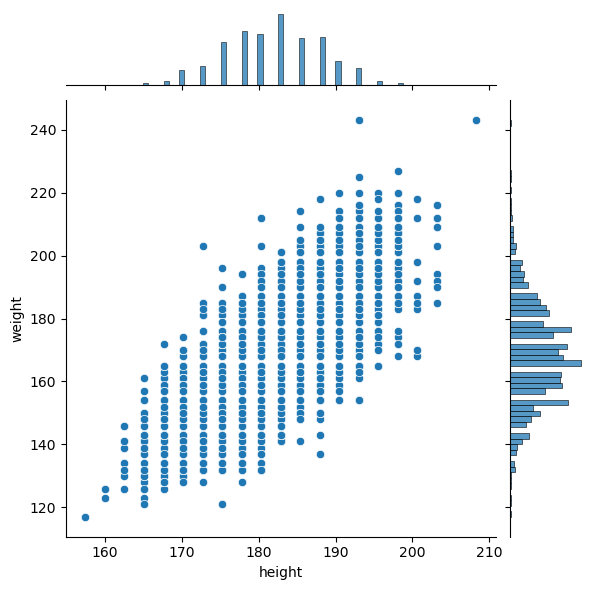

Person corr: 0.767
Height skewness: -0.005
Weight skewness: 0.182


<IPython.core.display.Javascript object>

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.histplot(data=df_player, x="height", bins=10, kde=True, ax=ax, color="r", alpha=0.3)
sns.histplot(data=df_player, x="weight", bins=10, kde=True, ax=ax, color="b", alpha=0.3)
ax.set_xlabel("Height (cm) / Weight (lbs)")
ax.set_ylabel("Count")
ax.set_title("Height and Weight Distributions")

pearson_corr = df_player["height"].corr(df_player["weight"])
height_skewness = stats.skew(df_player["height"])
weight_skewness = stats.skew(df_player["weight"])

jointplot = sns.jointplot(x="height", y="weight", data=df_player, kind="scatter")

plt.show()
print(
    f"Person corr: {pearson_corr:.3f}\nHeight skewness: {height_skewness:.3f}\nWeight skewness: {weight_skewness:.3f}"
)

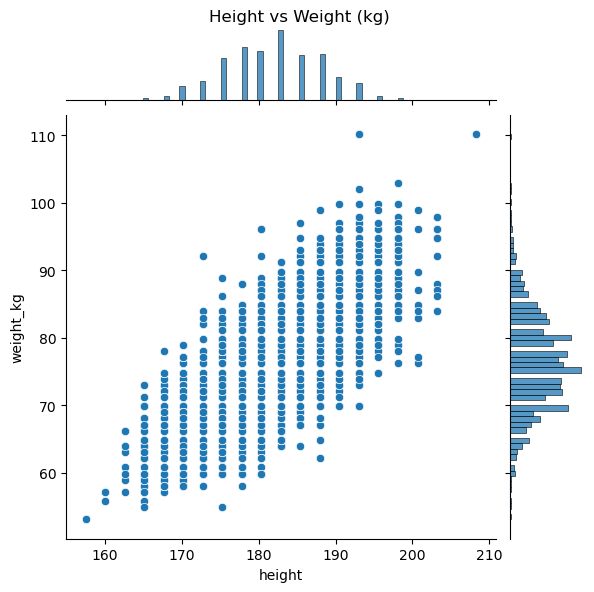

Pearson corr: 0.767
Height skewness: -0.005
Weight skewness: 0.182


<IPython.core.display.Javascript object>

In [72]:
df_player["weight_kg"] = df_player["weight"] * 0.453592

pearson_corr = df_player["height"].corr(df_player["weight_kg"])

height_skewness = stats.skew(df_player["height"])
weight_skewness = stats.skew(df_player["weight_kg"])

jointplot = sns.jointplot(x="height", y="weight_kg", data=df_player, kind="scatter")
jointplot.fig.suptitle("Height vs Weight (kg)")
jointplot.fig.subplots_adjust(top=0.95)
plt.show()
print(
    f"Pearson corr: {pearson_corr:.3f}\nHeight skewness: {height_skewness:.3f}\nWeight skewness: {weight_skewness:.3f}"
)


Both, player heights and weights seems to be normally distributed and positively correlated to each other.

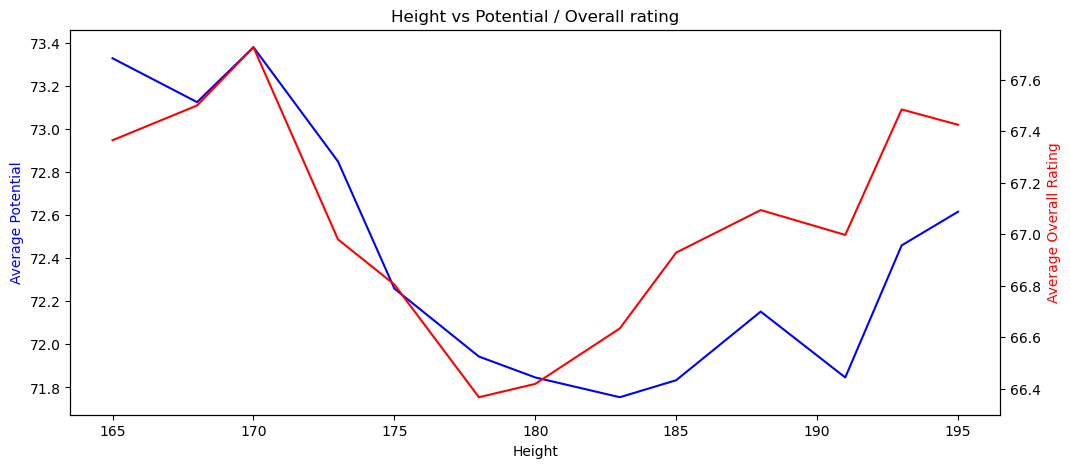

<IPython.core.display.Javascript object>

In [33]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

players_height.plot(x=0, y=["avg_potential"], ax=ax1, color="blue", legend=False)
players_height.plot(x=0, y=["avg_overall_rating"], ax=ax2, color="red", legend=False)

ax1.set_title("Height vs Potential / Overall rating")
ax1.set_xlabel("Height")
ax1.set_ylabel("Average Potential", color="blue")
ax2.set_ylabel("Average Overall Rating", color="red")

plt.show()

Height between 177-183cm looks like a "dead zone" to football players - on average these players have the lowest potential and overall rating.

##### Analysing football players preferred foot

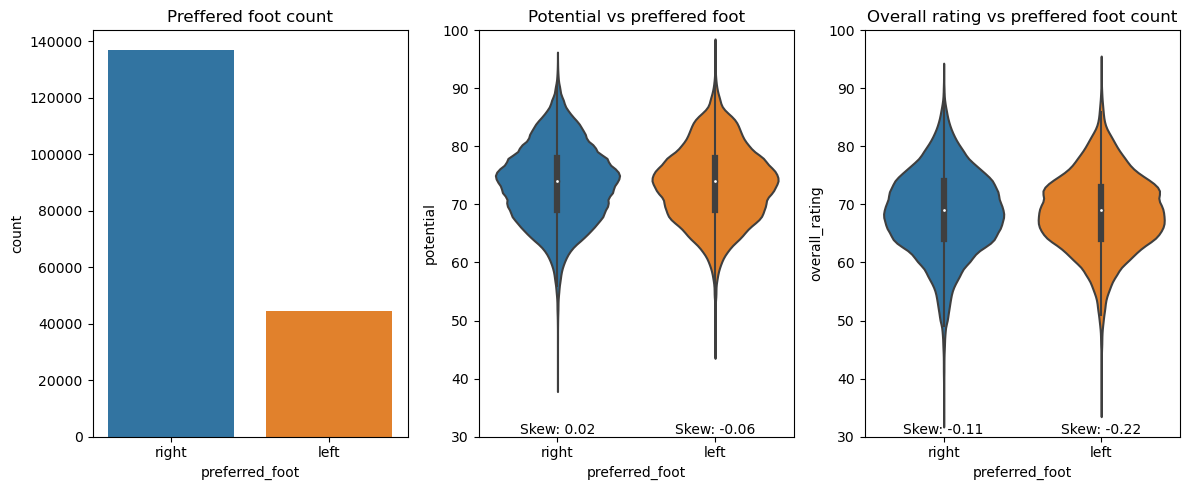

<IPython.core.display.Javascript object>

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
# Chart 1 - Count plot right/left foot
sns.countplot(x=df_player_att["preferred_foot"], ax=ax[0])
ax[0].set_title("Preffered foot count")

# Chart 2 - Violin plot Potential vs Preffered foot
sns.violinplot(data=df_player_att, x="preferred_foot", y="potential", ax=ax[1])
ax[1].set_title("Potential vs preffered foot")
skew_potential = (
    df_player_att.groupby("preferred_foot")["potential"].apply(stats.skew).values
)
for i, label in enumerate(ax[1].get_xticklabels()):
    ax[1].text(
        i,
        30,
        f"Skew: {skew_potential[i]:.2f}",
        ha="center",
        va="bottom",
    )
ax[1].set_ylim(30, 100)

# Chart 3 - Violin plot Overall Rating vs Preffered foot
sns.violinplot(data=df_player_att, x="preferred_foot", y="overall_rating", ax=ax[2])
ax[2].set_title("Overall rating vs preffered foot count")
skew_rating = (
    df_player_att.groupby("preferred_foot")["overall_rating"].apply(stats.skew).values
)
for i, label in enumerate(ax[2].get_xticklabels()):
    ax[2].text(
        i,
        30,
        f"Skew: {skew_rating[i]:.2f}",
        ha="center",
        va="bottom",
    )
ax[2].set_ylim(30, 100)

plt.tight_layout()
plt.show()

75% of players are right footed, however, by visually looking into comparison by potential and overall rating there doesn't seems to be a difference. We will use interference statistics to check this hypothesis.

##### Creating a dataframe with players grouped ball_handling, defence, shooting, passing, goal_keeping, overall rankings

In [35]:
best_players_att_q = """
SELECT 
    p.player_name,
    pa.player_fifa_api_id, 
    pa.overall_rating, 
    MAX((pa.ball_control + pa.dribbling)/2) AS ball_handling_avg, 
    MAX((pa.interceptions + pa.standing_tackle + pa.sliding_tackle) / 3) AS defence_avg,
    MAX((pa.finishing + pa.heading_accuracy + pa.free_kick_accuracy + pa.shot_power + pa.long_shots) / 5) AS shooting_avg,
    MAX((pa.vision + pa.crossing + pa.short_passing + pa.volleys + pa.long_passing) / 5) AS passing_avg,
    MAX((pa.gk_diving + pa.gk_handling + pa.gk_kicking + pa.gk_positioning + pa.gk_reflexes) / 5) AS gk_avg
FROM Player_Attributes pa
LEFT JOIN Player p ON pa.player_fifa_api_id = p.player_fifa_api_id
WHERE player_name IS NOT NULL
GROUP BY p.player_name
"""
best_players_att = pd.read_sql(best_players_att_q, con)

<IPython.core.display.Javascript object>

In [36]:
best_players_att.head(3)

,player_name,player_fifa_api_id,overall_rating,ball_handling_avg,defence_avg,shooting_avg,passing_avg,gk_avg
0,Aaron Appindangoye,218353,67,50,69.0,48,54.0,8
1,Aaron Cresswell,189615,47,72,73.0,62,65.0,24
2,Aaron Doran,186170,65,73,33.0,64,66.0,25


<IPython.core.display.Javascript object>

### Best players according to overall rating

In [37]:
top_overall = best_players_att.sort_values(by=["overall_rating"], ascending=False)[
    ["player_fifa_api_id", "player_name", "overall_rating"]
].head(3)
top_overall

,player_fifa_api_id,player_name,overall_rating
3913,1747,Gregory Coupet,92
4281,5479,Iker Casillas,91
9013,28130,Ronaldinho,91


<IPython.core.display.Javascript object>

### Best ball handling players (ball_control, dribbling)

In [38]:
top_handlers = best_players_att.sort_values(by=["ball_handling_avg"], ascending=False)[
    ["player_fifa_api_id", "player_name", "ball_handling_avg"]
].head(3)
top_handlers

,player_fifa_api_id,player_name,ball_handling_avg
6053,158023,Lionel Messi,97
9013,28130,Ronaldinho,97
1958,20801,Cristiano Ronaldo,96


<IPython.core.display.Javascript object>

### Best Defenders (interceptions,standing_tackle, sliding_tackle)

In [39]:
top_defenders = best_players_att.sort_values(by=["defence_avg"], ascending=False)[
    ["player_fifa_api_id", "player_name", "defence_avg"]
].head(3)
top_defenders

,player_fifa_api_id,player_name,defence_avg
8422,121939,Philipp Lahm,92.0
4645,142754,Javier Mascherano,92.0
1503,13038,Carles Puyol,91.0


<IPython.core.display.Javascript object>

### Best Shooters (finishing, heading_accuracy, free_kick_accuracy, shot_power, long_shots)

In [40]:
top_shooters = best_players_att.sort_values(by=["shooting_avg"], ascending=False)[
    ["player_fifa_api_id", "player_name", "shooting_avg"]
].head(3)
top_shooters

,player_fifa_api_id,player_name,shooting_avg
4140,7512,Hernan Crespo,90
9054,10704,Roy Makaay,90
2552,31432,Didier Drogba,90


<IPython.core.display.Javascript object>

### Best passers (vision, crossing, short_passing, volleys, long_passing)

In [41]:
top_passers = best_players_att.sort_values(by=["passing_avg"], ascending=False)[
    ["player_fifa_api_id", "player_name", "passing_avg"]
].head(3)
top_passers

,player_fifa_api_id,player_name,passing_avg
687,7763,Andrea Pirlo,90.0
3406,1238,Francesco Totti,90.0
10542,139869,Wesley Sneijder,90.0


<IPython.core.display.Javascript object>

### Best Goalkeepers (gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes')

In [42]:
top_gk = best_players_att.sort_values(by=["gk_avg"], ascending=False)[
    ["player_fifa_api_id", "player_name", "gk_avg"]
].head(3)
top_gk

,player_fifa_api_id,player_name,gk_avg
3913,1747,Gregory Coupet,89
8401,48940,Petr Cech,89
3748,1179,Gianluigi Buffon,89


<IPython.core.display.Javascript object>

### Best scorers

In [43]:
# Function that extract the players IDs who scored a goal
def getPlayersThatScored(xmlInfo):

    # Checking if xml info is not None
    if xmlInfo == None:
        return None

    scorers = []
    # Parsing XML string
    root = ET.fromstring(xmlInfo)
    for child in root:
        # Finding player and goal type elements
        player = child.find("player1")
        goal_type = child.find("goal_type")

        # Checking if they are not null
        if player != None and goal_type != None:
            # These values are not counted in final result / own goal
            if goal_type.text not in ["dg", "npm", "o", "rp"]:
                scorers.append(player.text)

    if len(scorers) > 0:
        return ";".join(scorers)
    else:
        return None

<IPython.core.display.Javascript object>

##### Creating a dataframe with detailed match information

In [44]:
detailed_matches_q = """
SELECT 
    Match.id, 
    Country.name AS country_name, 
    League.name AS league_name, 
    season, 
    stage, 
    date,
    HT.team_long_name AS  home_team,
    AT.team_long_name AS away_team,
    home_team_goal, 
    away_team_goal,
    goal
FROM Match
JOIN Country on Country.id = Match.country_id
JOIN League on League.id = Match.league_id
LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id                            
ORDER by date
"""
detailed_matches = pd.read_sql(detailed_matches_q, con)

<IPython.core.display.Javascript object>

In [45]:
detailed_matches["scorers"] = detailed_matches["goal"].apply(getPlayersThatScored)
detailed_matches.drop(["goal"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [46]:
detailed_matches[:3]

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,scorers
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,None
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,None
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,None


<IPython.core.display.Javascript object>

##### Checking which leagues contains scorers information

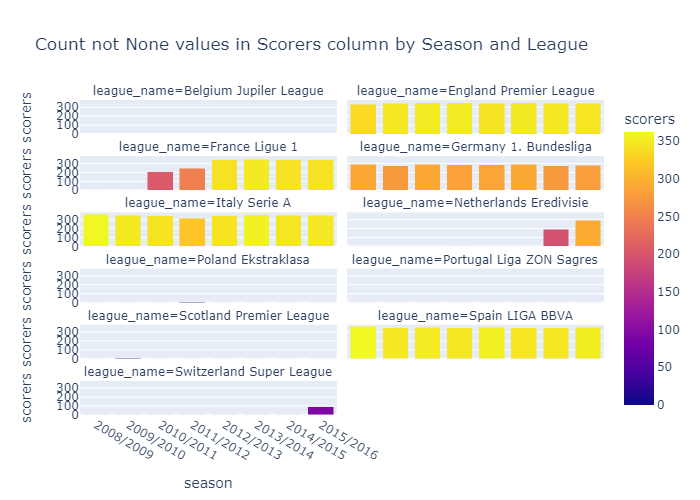

<IPython.core.display.Javascript object>

In [81]:
data = pd.pivot_table(
    detailed_matches,
    values="scorers",
    index=["season", "league_name"],
    aggfunc=lambda x: pd.notnull(x).sum(),
).reset_index()

fig = px.bar(
    data,
    x="season",
    y="scorers",
    color="scorers",
    color_discrete_map={0: "lightgrey", 1: "blue"},
    facet_col="league_name",
    facet_col_wrap=2,
    category_orders={"scorers": [0, 1]},
    title="Count not None values in Scorers column by Season and League",
)

fig.update_layout(barmode="stack")
show_fig(fig, render="image")

In many leagues there are no data of players who scored the goal. Therefore I will only analyze France, Italy, England, Germany and Spain countries football leagues scorers

In [48]:
def countGoalsByPlayer(columnItems, n):
    """Counts how many goals each player scored"""
    # Combine all the goal scorers IDs from df.column into a list
    items_list = [
        item for items in columnItems.values if items for item in items.split(";")
    ]
    # Counting occurences
    items_count = (
        pd.DataFrame(items_list, columns=["player_id"]).value_counts().reset_index()
    )
    items_count["player_id"] = items_count["player_id"].astype(int)
    items_count.columns = ["player_id", "goals"]

    def getPlayersName(df):
        """Retrieves player names"""
        df = df_player.merge(
            df, right_on="player_id", left_on="player_api_id", how="inner"
        )
        df.drop(
            columns=[
                "id",
                "player_api_id",
                "player_fifa_api_id",
                "birthday",
                "height",
                "weight",
                "player_id",
            ],
            inplace=True,
        )
        return df.sort_values("goals", ascending=False)

    # Get the top n scorers player names
    items_count = getPlayersName(items_count).head(n)

    return items_count

<IPython.core.display.Javascript object>

#### Top scorers 2008-2016

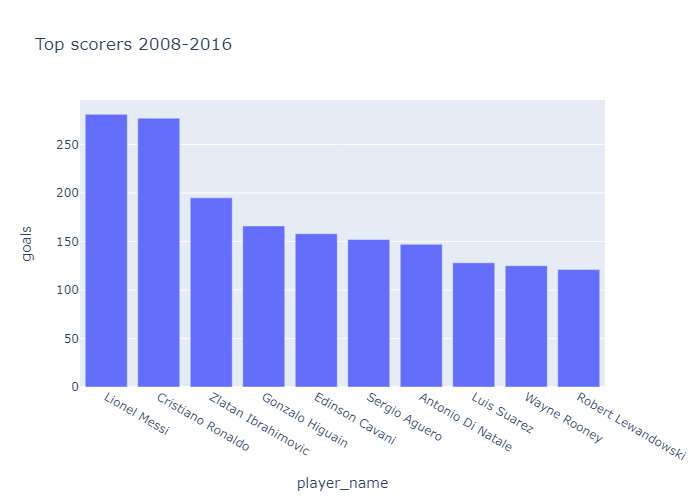

<IPython.core.display.Javascript object>

In [82]:
scorers_list_all = countGoalsByPlayer(detailed_matches["scorers"], 10)
fig = px.bar(
    scorers_list_all, x="player_name", y="goals", title="Top scorers 2008-2016"
)
show_fig(fig, render="image")

Messi and Ronaldo scored the most goals in 2008-2016 years, 281 and 277 accordingly.

##### Top scorers by league and season

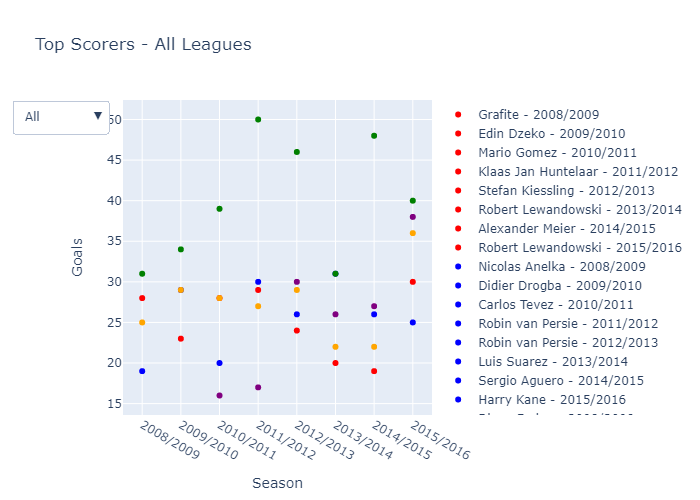

<IPython.core.display.Javascript object>

In [83]:
# Defining countries and assigning colors to them
countries = {
    "Germany": {"color": "red"},
    "England": {"color": "blue"},
    "Spain": {"color": "green"},
    "Italy": {"color": "orange"},
    "France": {"color": "purple"},
}
traces = []
# Iterating over each country and their data
for country, country_data in countries.items():
    # Filtering the matches by countries and grouping by season. Then counting the goals.
    data = (
        detailed_matches[detailed_matches["country_name"] == country]
        .groupby("season")
        .apply(lambda x: countGoalsByPlayer(x["scorers"], 1))
        .reset_index()
        .drop("level_1", axis=1)
    )

    # Creating a trace for each player in the data
    for _, row in data.iterrows():
        trace = go.Scatter(
            x=[row["season"]],
            y=[row["goals"]],
            name=f"{row['player_name']} - {row['season']}",
            mode="markers",
            marker=dict(color=country_data["color"]),
            hovertemplate="%{text}<extra>%{customdata}</extra>",
            text=[row["player_name"]],
            customdata=[f"{row['goals']}, {country}"],
        )
        traces.append(trace)

layout = go.Layout(
    title="Top Scorers - All Leagues",
    xaxis=dict(title="Season"),
    yaxis=dict(title="Goals"),
)

fig = go.Figure(data=traces, layout=layout)

# Defining the figure menu
updatemenus = [
    {
        "buttons": [
            {
                "label": "All",
                "method": "update",
                "args": [
                    {"visible": [True] * len(traces)},
                    {"title": "Top Scorers - All Leagues"},
                ],
            }
        ],
        "direction": "down",
        "showactive": True,
    }
]

# Iterating over each country to create country-specific update buttons
for country, country_data in countries.items():
    # Determing the visibility of the all traces for the sellected country
    visible = [
        trace.customdata[0].split(",")[-1].strip() == country for trace in traces
    ]
    button = {
        "label": country,
        "method": "update",
        "args": [
            {"visible": visible},
            {"title": f"Top Scorers - {country}"},
        ],
    }
    updatemenus[0]["buttons"].append(button)

fig.update_layout(updatemenus=updatemenus)
show_fig(fig, render="image")

By comparing the top scorers of each season by league, we can clearly see that in Spain football league top players outperforms the players from other leagues, most of the seasons scoring 40+ goals per season. While in the other leagues, best scorers ends up with 20-30 goals on average.

### Matches

##### Checking the distribution of Home / Away wins, and Tie matches

In [51]:
result_counts = (
    detailed_matches.groupby("season")[["home_team_goal", "away_team_goal"]]
    .apply(
        lambda x: pd.Series(
            [
                (x["home_team_goal"] > x["away_team_goal"]).sum(),
                (x["home_team_goal"] < x["away_team_goal"]).sum(),
                (x["home_team_goal"] == x["away_team_goal"]).sum(),
            ],
            index=["Home_Wins", "Away_Wins", "Tie_Matches"],
        )
    )
    .reset_index()
)
total_row = result_counts.sum(numeric_only=True)
total_row["season"] = "Total"
result_counts = pd.concat([result_counts, total_row.to_frame().T], ignore_index=True)

<IPython.core.display.Javascript object>

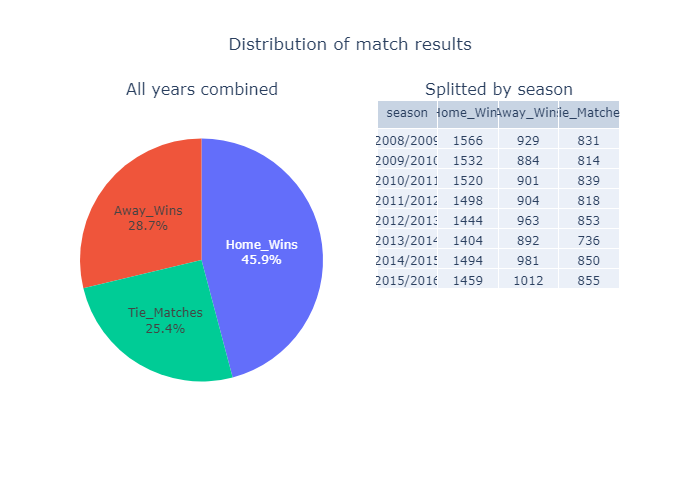

<IPython.core.display.Javascript object>

In [84]:
# Index of last (total values) row
last_row = len(result_counts) - 1

# Extracting total all given seasons values
home_wins_n = result_counts.loc[last_row, "Home_Wins"]
away_wins_n = result_counts.loc[last_row, "Away_Wins"]
tie_matches_n = result_counts.loc[last_row, "Tie_Matches"]

# Creating Pie Chart
labels = ["Home_Wins", "Away_Wins", "Tie_Matches"]
values = [home_wins_n, away_wins_n, tie_matches_n]
fig_pie = px.pie(names=labels, values=values)
fig_pie.update_traces(textposition="inside", textinfo="percent+label")

# Creating a Table
season_data = result_counts.iloc[:-1]
fig_table = go.Figure(
    data=[
        go.Table(
            header=dict(values=result_counts.columns),
            cells=dict(
                values=[
                    season_data.season,
                    season_data.Home_Wins,
                    season_data.Away_Wins,
                    season_data.Tie_Matches,
                ]
            ),
        )
    ]
)

# Combining subplots
fig = sp.make_subplots(
    1,
    2,
    specs=[[{"type": "pie"}, {"type": "table"}]],
    subplot_titles=("All years combined", "Splitted by season"),
    
)

fig.add_trace(fig_pie.data[0], row=1, col=1)
fig.add_trace(fig_table.data[0], row=1, col=2)
fig.update_layout(title="Distribution of match results", title_x=0.5, showlegend=False)
show_fig(fig, render="image")

The number of home wins has been consistently higher than the number of away wins. Home team wins nearly half of the fotball matches 2008-2016.

There are similar number of Away_wins matches compared to Tie_Matches (28.7% and 25.4% accordingly)

### Statistical Intereference

#### Is there are significant difference in Potential / Overall Rating when comparing left and right foot players?

In [53]:
def get_significance(p):
    if p <= 0.05:
        return "There is significant difference"
    elif p > 0.05:
        return "There is no significant difference"

<IPython.core.display.Javascript object>

In [54]:
left_potential = df_player_att[df_player_att["preferred_foot"] == "left"]["potential"]
right_potential = df_player_att[df_player_att["preferred_foot"] == "right"]["potential"]
left_rating = df_player_att[df_player_att["preferred_foot"] == "left"]["overall_rating"]
right_rating = df_player_att[df_player_att["preferred_foot"] == "right"][
    "overall_rating"
]

s, p = stats.ttest_ind(left_potential, right_potential)
print(f"Two-sample t-test (preferred foot vs potential): \n{get_significance(p)}")
s, p = stats.ttest_ind(left_rating, right_rating)
print(f"\nTwo-sample t-test (preferred foot vs rating): \n{get_significance(p)}")

Two-sample t-test (preferred foot vs potential): 
There is no significant difference

Two-sample t-test (preferred foot vs rating): 
There is no significant difference


<IPython.core.display.Javascript object>

### Predicting score

#### Collecting data

In [55]:
def get_match_label(match):
    """Get match result labels (Win/Draw/Defeat)"""
    home_goals = match["home_team_goal"]
    away_goals = match["away_team_goal"]

    label = pd.DataFrame()
    label.loc[0, "match_api_id"] = match["match_api_id"]

    # Assigning labels
    if home_goals > away_goals:
        label.loc[0, "label"] = "Win"
    if home_goals == away_goals:
        label.loc[0, "label"] = "Draw"
    if home_goals < away_goals:
        label.loc[0, "label"] = "Defeat"
    return label.loc[0]

<IPython.core.display.Javascript object>

In [56]:
def get_player_rating(match, player_stats):
    """Gets participated players ranking for a 1 given match."""

    # Define variables
    match_id = match.match_api_id
    date = match["date"]
    players = [
        "home_player_1",
        "home_player_2",
        "home_player_3",
        "home_player_4",
        "home_player_5",
        "home_player_6",
        "home_player_7",
        "home_player_8",
        "home_player_9",
        "home_player_10",
        "home_player_11",
        "away_player_1",
        "away_player_2",
        "away_player_3",
        "away_player_4",
        "away_player_5",
        "away_player_6",
        "away_player_7",
        "away_player_8",
        "away_player_9",
        "away_player_10",
        "away_player_11",
    ]
    player_stats_new = pd.DataFrame()
    names = []

    # Loop through all players
    for player in players:
        # Get player ID
        player_id = match[player]

        # Get player stats
        stats = player_stats[player_stats.player_api_id == player_id]

        # Identify current stats
        current_stats = stats[stats.date < date].sort_values(
            by="date", ascending=False
        )[:1]

        if np.isnan(player_id):
            overall_rating = pd.Series(0)
        elif not current_stats.empty:
            current_stats.reset_index(inplace=True, drop=True)
            overall_rating = pd.Series(current_stats.loc[0, "overall_rating"])
        else:
            overall_rating = pd.Series(0)

        # Rename stat
        name = "{}_overall_rating".format(player)
        names.append(name)

        # Aggregate stats
        player_stats_new = pd.concat([player_stats_new, overall_rating], axis=1)

    player_stats_new.columns = names
    player_stats_new["match_api_id"] = match_id

    player_stats_new.reset_index(inplace=True, drop=True)

    # Return player stats
    return player_stats_new.iloc[0]


def match_players_ratings(matches, player_stats):
    """Gets fifa data for all matches."""

    # Initialize an empty list to store the fifa data
    fifa_data_list = []

    # Apply get_player_rating for each match
    for index, match in matches.iterrows():
        stats = get_player_rating(match, player_stats)
        fifa_data_list.append(stats)

    # Concatenate the list of DataFrames into a single DataFrame
    fifa_data = pd.concat(fifa_data_list, axis=1).T

    # Return fifa_data
    return fifa_data

<IPython.core.display.Javascript object>

In [57]:
def get_recent_matches(matches, date, team, n=10):
    """Gets last n matches of given team_id in general"""
    team_matches = matches[
        (matches["home_team_api_id"] == team) | (matches["away_team_api_id"] == team)
    ]
    recent_matches = (
        team_matches[team_matches.date < date]
        .sort_values(by="date", ascending=False)
        .iloc[0:n, :]
    )
    return recent_matches


def get_recent_matches_against_eachother(matches, date, home_team, away_team, n=5):
    """Gets last n matches against two given team_ids"""
    home_matches = matches[
        (matches["home_team_api_id"] == home_team)
        & (matches["away_team_api_id"] == away_team)
    ]
    away_matches = matches[
        (matches["home_team_api_id"] == away_team)
        & (matches["away_team_api_id"] == home_team)
    ]
    total_matches = pd.concat([home_matches, away_matches])
    # Trying to pick n number of matches against each other
    try:
        last_matches = (
            total_matches[total_matches.date < date]
            .sort_values(by="date", ascending=False)
            .iloc[0:n, :]
        )

    # If there are less than n number of matches, taking all matches there are available
    except:
        last_matches = (
            total_matches[total_matches.date < date]
            .sort_values(by="date", ascending=False)
            .iloc[0 : total_matches.shape[0], :]
        )
        # If there are more than n number of matches and it went to except part - raising error.
        if last_matches.shapes[0] > n:
            print("Error in obtaining matches")
    return last_matches


def get_goals(matches, team):
    """Gets number of scored goals of a given team in given matches"""
    home_goals = int(matches.home_team_goal[matches.home_team_api_id == team].sum())
    away_goals = int(matches.away_team_goal[matches.away_team_api_id == team].sum())
    total_goals = home_goals + away_goals
    return total_goals


def get_allowed_goals(matches, team):
    """Gets number of allowed goals of a given team in given matches"""
    home_goals = int(matches.home_team_goal[matches.away_team_api_id == team].sum())
    away_goals = int(matches.away_team_goal[matches.home_team_api_id == team].sum())
    total_goals = home_goals + away_goals
    return total_goals


def get_wins(matches, team):
    """Gets number of wins for given team in given set of matches"""
    home_wins = int(
        matches.home_team_goal[
            (matches.home_team_api_id == team)
            & (matches.home_team_goal > matches.away_team_goal)
        ].count()
    )
    away_wins = int(
        matches.home_team_goal[
            (matches.away_team_api_id == team)
            & (matches.away_team_goal > matches.home_team_goal)
        ].count()
    )
    total_wins = home_wins + away_wins

    return total_wins


def get_match_features(match, matches, n=10):
    """Creating The following features for a given match of a given range of matches:
    home_team_goals_difference
    away_team_goals_difference
    games_won_home_team
    games_won_away_team
    games_against_won
    games_against_lost
    """
    date = match.date
    home_team = match.home_team_api_id
    away_team = match.away_team_api_id

    matches_home_team = get_recent_matches(matches, date, home_team, n=10)
    matches_away_team = get_recent_matches(matches, date, away_team, n=10)

    last_matches_against = get_recent_matches_against_eachother(
        matches, date, home_team, away_team, n=3
    )

    home_goals = get_goals(matches_home_team, home_team)
    away_goals = get_goals(matches_away_team, away_team)
    home_goals_allowed = get_allowed_goals(matches_home_team, home_team)
    away_goals_allowed = get_allowed_goals(matches_away_team, away_team)

    result = pd.DataFrame()


    result.loc[0, "match_api_id"] = match.match_api_id
    result.loc[0, "league_id"] = match.league_id
    result.loc[0, "home_team_goals_difference"] = home_goals - home_goals_allowed
    result.loc[0, "away_team_goals_difference"] = away_goals - away_goals_allowed
    result.loc[0, "games_won_home_team"] = get_wins(matches_home_team, home_team)
    result.loc[0, "games_won_away_team"] = get_wins(matches_away_team, away_team)
    result.loc[0, "games_against_won"] = get_wins(last_matches_against, home_team)
    result.loc[0, "games_against_lost"] = get_wins(last_matches_against, away_team)

    return result.loc[0]

<IPython.core.display.Javascript object>

In [58]:
def get_feables(matches, players, horizontal=True, n=10):
    """Creates features and labels for all matches"""
    fifa_stats = match_players_ratings(matches, players)
    match_stats = matches.apply(lambda x: get_match_features(x, matches, n=10), axis=1)

    # Create Dummies for league ID feature
    dummies = pd.get_dummies(match_stats["league_id"]).rename(
        columns=lambda x: "League_" + str(x)
    )
    match_stats = pd.concat([match_stats, dummies], axis=1)
    match_stats.drop(["league_id"], inplace=True, axis=1)

    # Create match labels
    labels = matches.apply(get_match_label, axis=1)

    features = pd.merge(match_stats, fifa_stats, on="match_api_id", how="left")
    feables = pd.merge(features, labels, on="match_api_id", how="left")

    feables.dropna(inplace=True)

    return feables

<IPython.core.display.Javascript object>

In [59]:
def logistic_regression(X_train, X_test, y_train, y_test):
    """fits passed data into model and gives back results
    Data:
    X_train, X_test, y_train, y_test"""
    model = LogisticRegression(max_iter=26000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    coefficients = model.coef_[0]
    feature_names = X_train.columns

    coefficients_df = pd.DataFrame(
        {"Feature": feature_names, "Coefficient": coefficients}
    )
    coefficients_df.sort_values(by="Coefficient", ascending=False, inplace=True)
    print(
        "-----------------------------------------------------------------------------------------------"
    )
    print("Significant Features:")
    print(coefficients_df.reset_index())
    print(
        "-----------------------------------------------------------------------------------------------"
    )

    # Generate a classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    print(
        "-----------------------------------------------------------------------------------------------"
    )

    plt.figure()
    cm = ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, cmap=plt.cm.Blues, normalize="true"
    )
    plt.title("Confusion Matrix (Normalized)")
    plt.plot()

<IPython.core.display.Javascript object>

#### Creating a model with all data

In [60]:
get_feables(df_match[:10], df_player_att)

,match_api_id,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost,League_1.0,home_player_1_overall_rating,home_player_2_overall_rating,...,away_player_3_overall_rating,away_player_4_overall_rating,away_player_5_overall_rating,away_player_6_overall_rating,away_player_7_overall_rating,away_player_8_overall_rating,away_player_9_overall_rating,away_player_10_overall_rating,away_player_11_overall_rating,label
0,492473.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Draw
1,492474.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Draw
2,492475.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Defeat
3,492476.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Win
4,492477.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Defeat
5,492478.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Draw
6,492479.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Draw
7,492480.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Defeat
8,492481.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Win
9,492564.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,Win


<IPython.core.display.Javascript object>

-----------------------------------------------------------------------------------------------
Significant Features:
    index                        Feature  Coefficient
0      14                 League_19694.0     0.166631
1      16                 League_24558.0     0.025334
2       1     away_team_goals_difference     0.019718
3       5             games_against_lost     0.019366
4       9                  League_7809.0     0.016169
5       3            games_won_away_team     0.006956
6      32   away_player_5_overall_rating     0.004472
7      35   away_player_8_overall_rating     0.004236
8      38  away_player_11_overall_rating     0.003918
9      33   away_player_6_overall_rating     0.003818
10     30   away_player_3_overall_rating     0.003686
11     34   away_player_7_overall_rating     0.003639
12     37  away_player_10_overall_rating     0.003163
13     29   away_player_2_overall_rating     0.002552
14     31   away_player_4_overall_rating     0.002415
15     36   away_p

<Figure size 640x480 with 0 Axes>

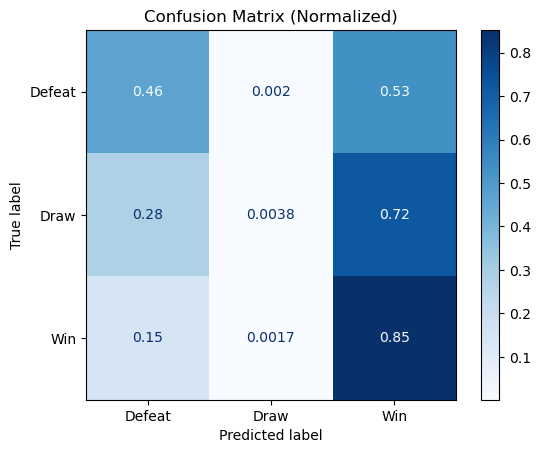

<IPython.core.display.Javascript object>

In [61]:
modelling_data_all = get_feables(df_match, df_player_att)
inputs_all = modelling_data_all.drop("match_api_id", axis=1)
labels_all = inputs_all.loc[:, "label"]
features_all = inputs_all.drop("label", axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features_all, labels_all, test_size=0.2, random_state=42, stratify=labels_all
)

logistic_regression(X_train, X_test, y_train, y_test)

##### Interpreting the results

Precision:
49% of predicted defeats are correct.
33% of predicted draw are correct.
54% of predicted wins are correct.

Recall:
Correctly indentifies 46% of actual defeats.
Model fails to indentify any true draws.
Correctly indentifies 85% of actual wins.

The F1 score of 0.66 in Win prediction, suggests good balance between precision and recall for this class.

Since we are predicting categorical variable, looking into feature coefficients may not provide meaningful insights. However, most of the negative coefficients are for players overall_ratings. Let's check if our model improves without them.

#### Logistic regression without players overall_ratings

-----------------------------------------------------------------------------------------------
Significant Features:
    index                     Feature  Coefficient
0      14              League_19694.0     0.149195
1       5          games_against_lost     0.048496
2       9               League_7809.0     0.040930
3       1  away_team_goals_difference     0.026854
4       3         games_won_away_team     0.026638
5      16              League_24558.0     0.020500
6       6                  League_1.0    -0.001503
7      13              League_17642.0    -0.003276
8       7               League_1729.0    -0.021753
9       0  home_team_goals_difference    -0.023078
10      2         games_won_home_team    -0.028489
11     11              League_13274.0    -0.032597
12     15              League_21518.0    -0.039897
13     12              League_15722.0    -0.060972
14      8               League_4769.0    -0.072728
15     10              League_10257.0    -0.087429
16      4      

<Figure size 640x480 with 0 Axes>

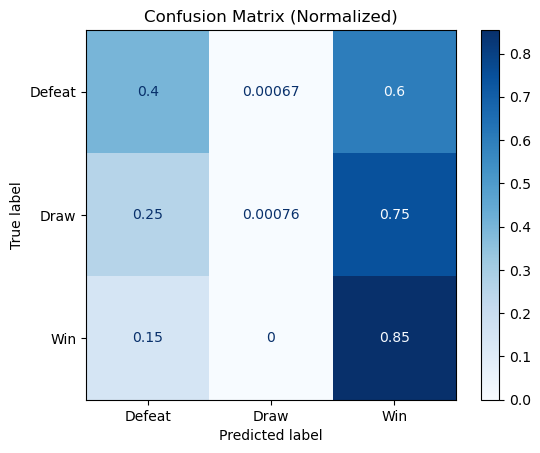

<IPython.core.display.Javascript object>

In [62]:
home_player_variables = [
    "home_player_1_overall_rating",
    "home_player_2_overall_rating",
    "home_player_3_overall_rating",
    "home_player_4_overall_rating",
    "home_player_5_overall_rating",
    "home_player_6_overall_rating",
    "home_player_7_overall_rating",
    "home_player_8_overall_rating",
    "home_player_9_overall_rating",
    "home_player_10_overall_rating",
    "home_player_11_overall_rating",
]

away_player_variables = [
    "away_player_1_overall_rating",
    "away_player_2_overall_rating",
    "away_player_3_overall_rating",
    "away_player_4_overall_rating",
    "away_player_5_overall_rating",
    "away_player_6_overall_rating",
    "away_player_7_overall_rating",
    "away_player_8_overall_rating",
    "away_player_9_overall_rating",
    "away_player_10_overall_rating",
    "away_player_11_overall_rating",
]

features_wout_player_data = features_all.drop(
    columns=home_player_variables + away_player_variables
)

X_train, X_test, y_train, y_test = train_test_split(
    features_wout_player_data,
    labels_all,
    test_size=0.2,
    random_state=42,
    stratify=labels_all,
)

logistic_regression(X_train, X_test, y_train, y_test)

The only thing where the second model performed better, is that instead of 33%, right now 50% of predicted Draws were correct. However, the recall shows that it still fails to predict the draw results (0.076%).

#### Can we predict 2015/2016 season just by 2014/20/15 season data?

In [63]:
df_match_2014_15 = df_match[df_match["season"] == "2014/2015"]
df_match_2015_16 = df_match[df_match["season"] == "2015/2016"]

modelling_data_2014_15 = get_feables(df_match_2014_15, df_player_att)
modelling_data_2015_16 = get_feables(df_match_2015_16, df_player_att)

<IPython.core.display.Javascript object>

-----------------------------------------------------------------------------------------------
Significant Features:
    index                        Feature  Coefficient
0      14                 League_19694.0     0.264168
1      11                 League_13274.0     0.052813
2       6                     League_1.0     0.046213
3      16                 League_24558.0     0.036509
4       7                  League_1729.0     0.027405
5       1     away_team_goals_difference     0.021336
6      32   away_player_5_overall_rating     0.018529
7      35   away_player_8_overall_rating     0.015193
8      28   away_player_1_overall_rating     0.014446
9      15                 League_21518.0     0.012916
10     31   away_player_4_overall_rating     0.012600
11      2            games_won_home_team     0.009088
12     37  away_player_10_overall_rating     0.007124
13     30   away_player_3_overall_rating     0.006704
14     38  away_player_11_overall_rating     0.002796
15     34   away_p

<Figure size 640x480 with 0 Axes>

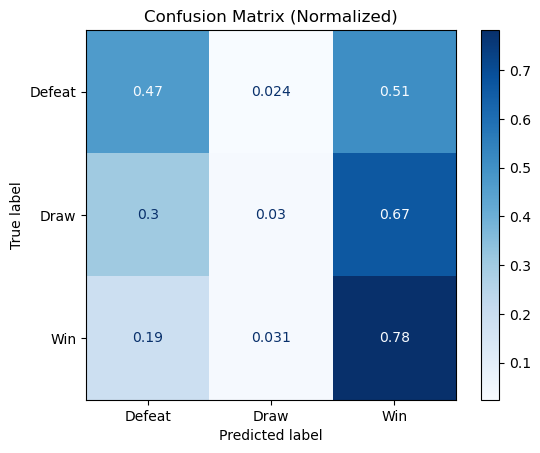

<IPython.core.display.Javascript object>

In [64]:
# Filtering matches table to exact seasons
df_match_2014_15 = df_match[df_match["season"] == "2014/2015"]
df_match_2015_16 = df_match[df_match["season"] == "2015/2016"]

# Getting data for selected matches
modelling_data_2014_15 = get_feables(df_match_2014_15, df_player_att)
modelling_data_2015_16 = get_feables(df_match_2015_16, df_player_att)

# Filtering out features and labels
inputs_2014_15 = modelling_data_2014_15.drop("match_api_id", axis=1)
labels_2014_15 = inputs_2014_15.loc[:, "label"]
features_2014_15 = inputs_2014_15.drop("label", axis=1)

inputs_2015_16 = modelling_data_2015_16.drop("match_api_id", axis=1)
labels_2015_16 = inputs_2015_16.loc[:, "label"]
features_2015_16 = inputs_2015_16.drop("label", axis=1)

# Fitting data into the model
X_train = features_2014_15
X_test = features_2015_16
y_train = labels_2014_15
y_test = labels_2015_16

logistic_regression(X_train, X_test, y_train, y_test)

Model performed a bit worse in comparison to the first model which used all data, but accuracy is at 0.49 which suggesting that the model's performance is still better than random guessing.

# Conclusions

Most of the leagues have 16-20 teams. While Scotland and Switzerland football leagues only have 10-12 teams included.


During the early years 2008-2012, we can see that there was quite high correlation between home advantage and number of goals scored per game. However, this correlation decreases together with decreasing home advantage over the years.


The highest number of buildup statistics can be seen in England and Scotland countries football leagues, which could indicate that football matches can be more entertaining to watch if you like fast, with many passes football. While the lowest score is in Belgium and Netherlands football leagues.


Germany Poland and Spain football leagues have the highest Chance creation statistic. These football leagues tends to have a higher quality of created chances. While Belgium's has the lowest score.


Height between 177-183cm looks like a "dead zone" to football players - on average these players have the lowest potential and overall rating.


75% of players are right footed, But, by comparing potential and overall rating by preferred foot, there are no significant difference between the players.


Messi and Ronaldo scored the most goals in 2008-2016 years, 281 and 277 accordingly.


By comparing the top scorers of each season by league, we can clearly see that in Spain football league top players outperforms the players from other leagues, most of the seasons scoring 40+ goals per season. While in the other leagues, best scorers ends up with 20-30 goals on average.


45.9% of football matches wins home_team. There are similar number of Away_wins matches compared to Tie_Matches (28.7% and 25.4% accordingly).


Our model correctly identified 85% of actual wins, however Only 54% of predicted values were correct. The accuracy of 53 percent shows that it performed still better than random guessing.


By taking 2014/2015 season data to predict 2015/2016 season matches, our model performed better than random guessing.

### What could be improved?

Try clustering algorithms to find similar players of manually made clusters for top defenders, shooters, etc.

Use more given data for example, positions, age for EDA.

I believe model can be improved by taking into account red cards.

